In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the dataset
data = pd.read_csv("/usr/uni_data2.csv")

In [27]:
# Data Cleaning
data.drop_duplicates(inplace=True)  # Remove duplicates
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

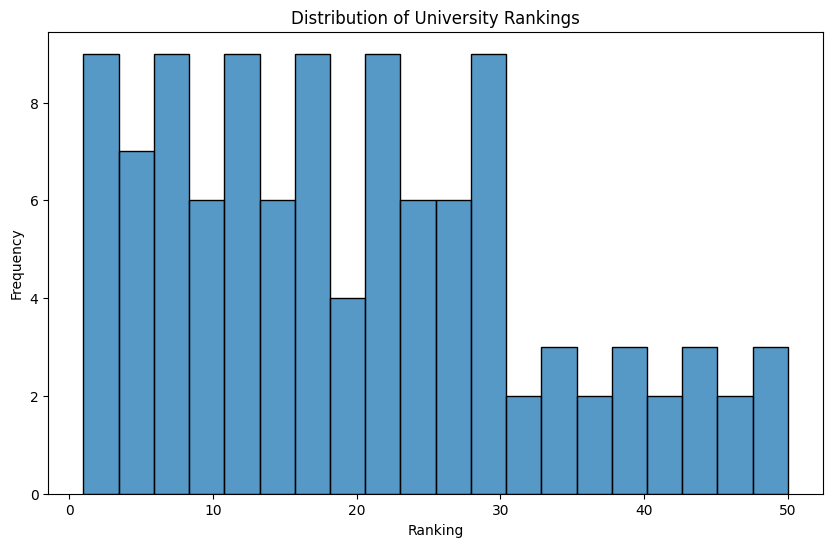

In [28]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Ranking'], bins=20)
plt.title('Distribution of University Rankings')
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.show()

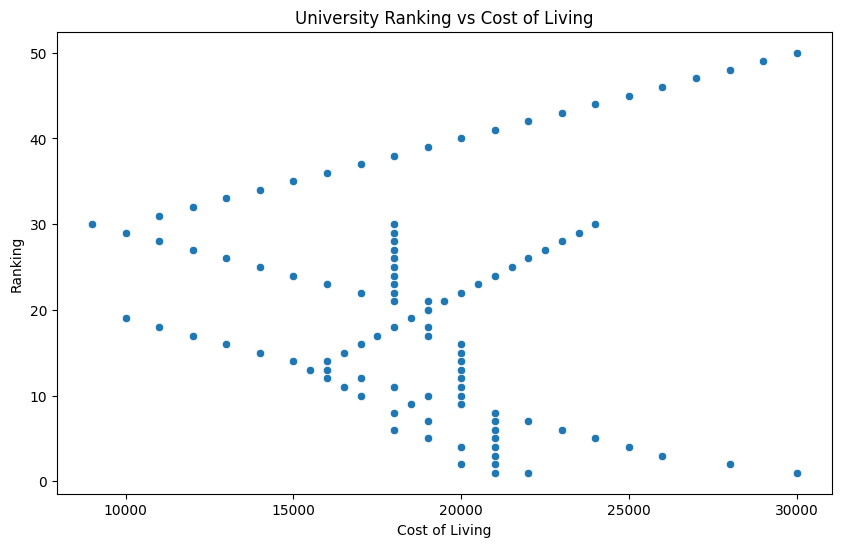

In [29]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of Living', y='Ranking', data=data)
plt.title('University Ranking vs Cost of Living')
plt.xlabel('Cost of Living')
plt.ylabel('Ranking')
plt.show()

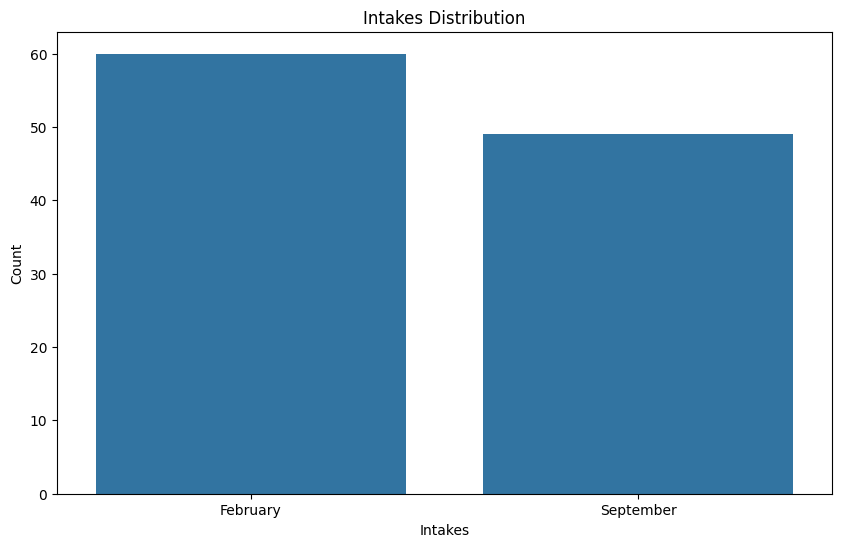

In [30]:
# Visualization
# Bar plot of Intakes
plt.figure(figsize=(10, 6))
sns.countplot(x='Intakes', data=data)
plt.title('Intakes Distribution')
plt.xlabel('Intakes')
plt.ylabel('Count')
plt.show()

In [31]:
# Statistical Analysis
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
          Ranking  Cost of Living  Application Fees  \
count  109.000000      109.000000        109.000000   
mean    19.908257    19041.284404         63.055046   
std     12.870107     4237.797537         53.172254   
min      1.000000     9000.000000          6.500000   
25%      9.000000    17000.000000          6.500000   
50%     18.000000    19000.000000         95.000000   
75%     28.000000    21000.000000        100.000000   
max     50.000000    30000.000000        165.000000   

       Under Graduate GPA/Percentage  Under Graduate Tuition Fees  \
count                     109.000000                   109.000000   
mean                       81.146789                 30059.633028   
std                        12.974923                  7564.452922   
min                        50.000000                 12000.000000   
25%                        70.000000                 24000.000000   
50%                        85.000000                 31000.000000 

In [32]:
data['Recommendation Score'] = data['Ranking'] * (1 / data['Cost of Living'])

In [33]:
# Rank universities based on the recommendation score
recommended_universities = data.sort_values(by='Recommendation Score', ascending=False)

# Display top 5 recommended universities
print("\nTop 5 Recommended Universities:")
print(recommended_universities[['Name', 'Location', 'Ranking', 'Cost of Living', 'Recommendation Score']].head())



Top 5 Recommended Universities:
                           Name   Location  Ranking  Cost of Living  \
82   University of Saskatchewan  Saskatoon       30            9000   
116      University of Manitoba   Winnipeg       29           10000   
117      University of Manitoba   Winnipeg       31           11000   
65         University of Ottawa     Ottawa       32           12000   
96              York University    Toronto       28           11000   

     Recommendation Score  
82               0.003333  
116              0.002900  
117              0.002818  
65               0.002667  
96               0.002545  


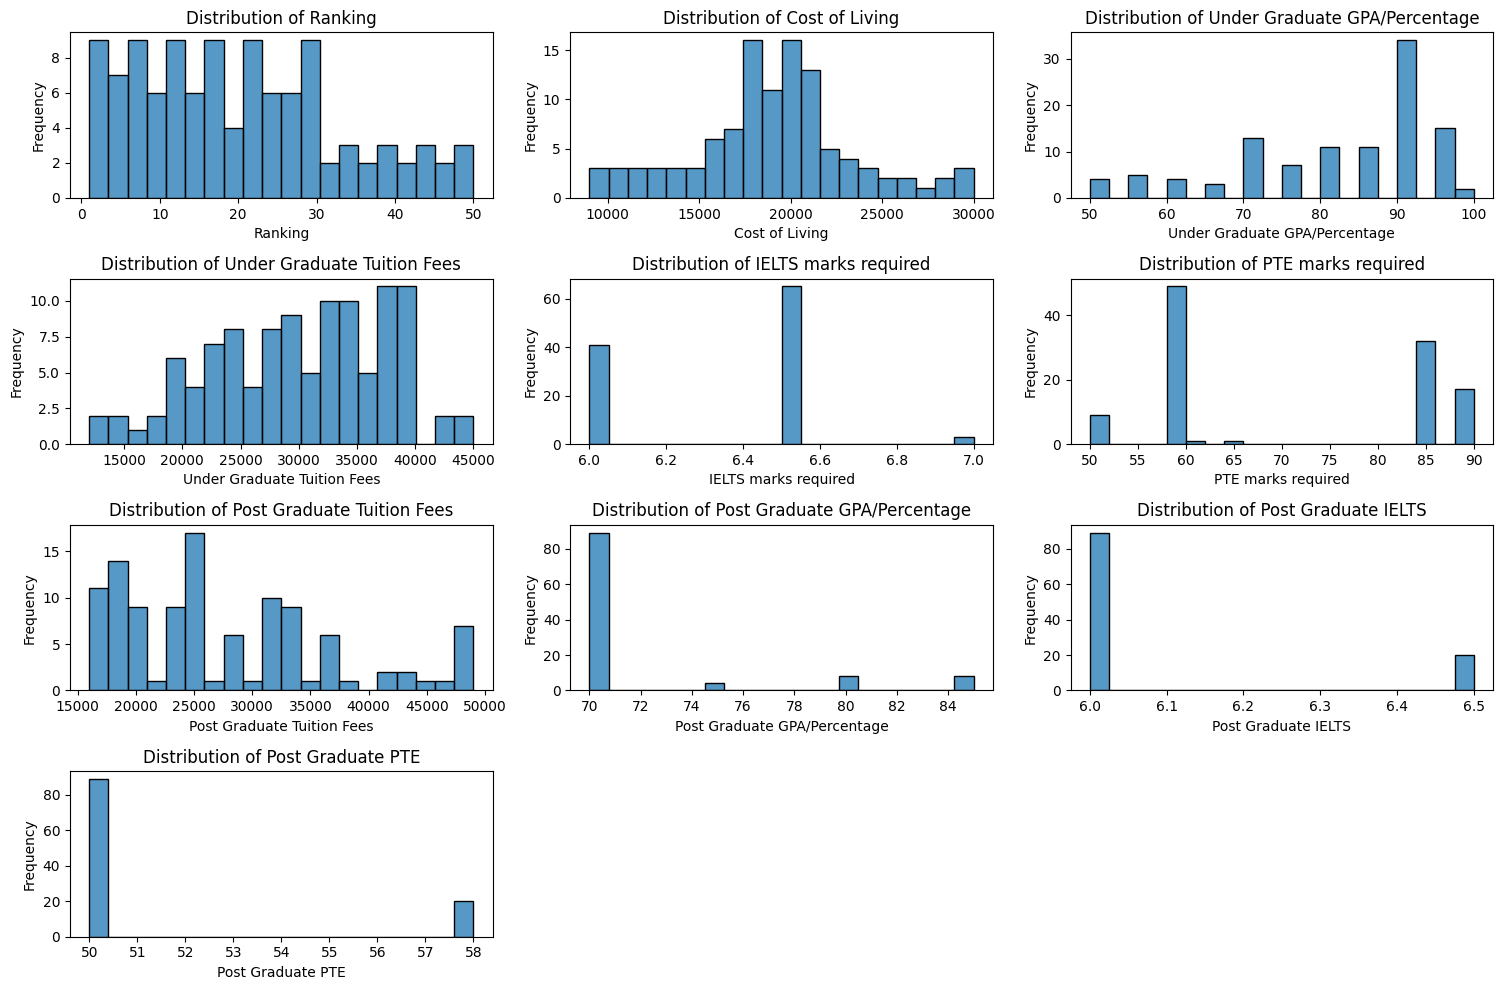

In [34]:
# Exploratory Data Analysis (EDA)
# Histograms for numerical variables
numerical_cols = ['Ranking', 'Cost of Living', 'Under Graduate GPA/Percentage',
                  'Under Graduate Tuition Fees', 'IELTS marks required',
                  'PTE marks required', 'Post Graduate Tuition Fees',
                  'Post Graduate GPA/Percentage', 'Post Graduate IELTS',
                  'Post Graduate PTE']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

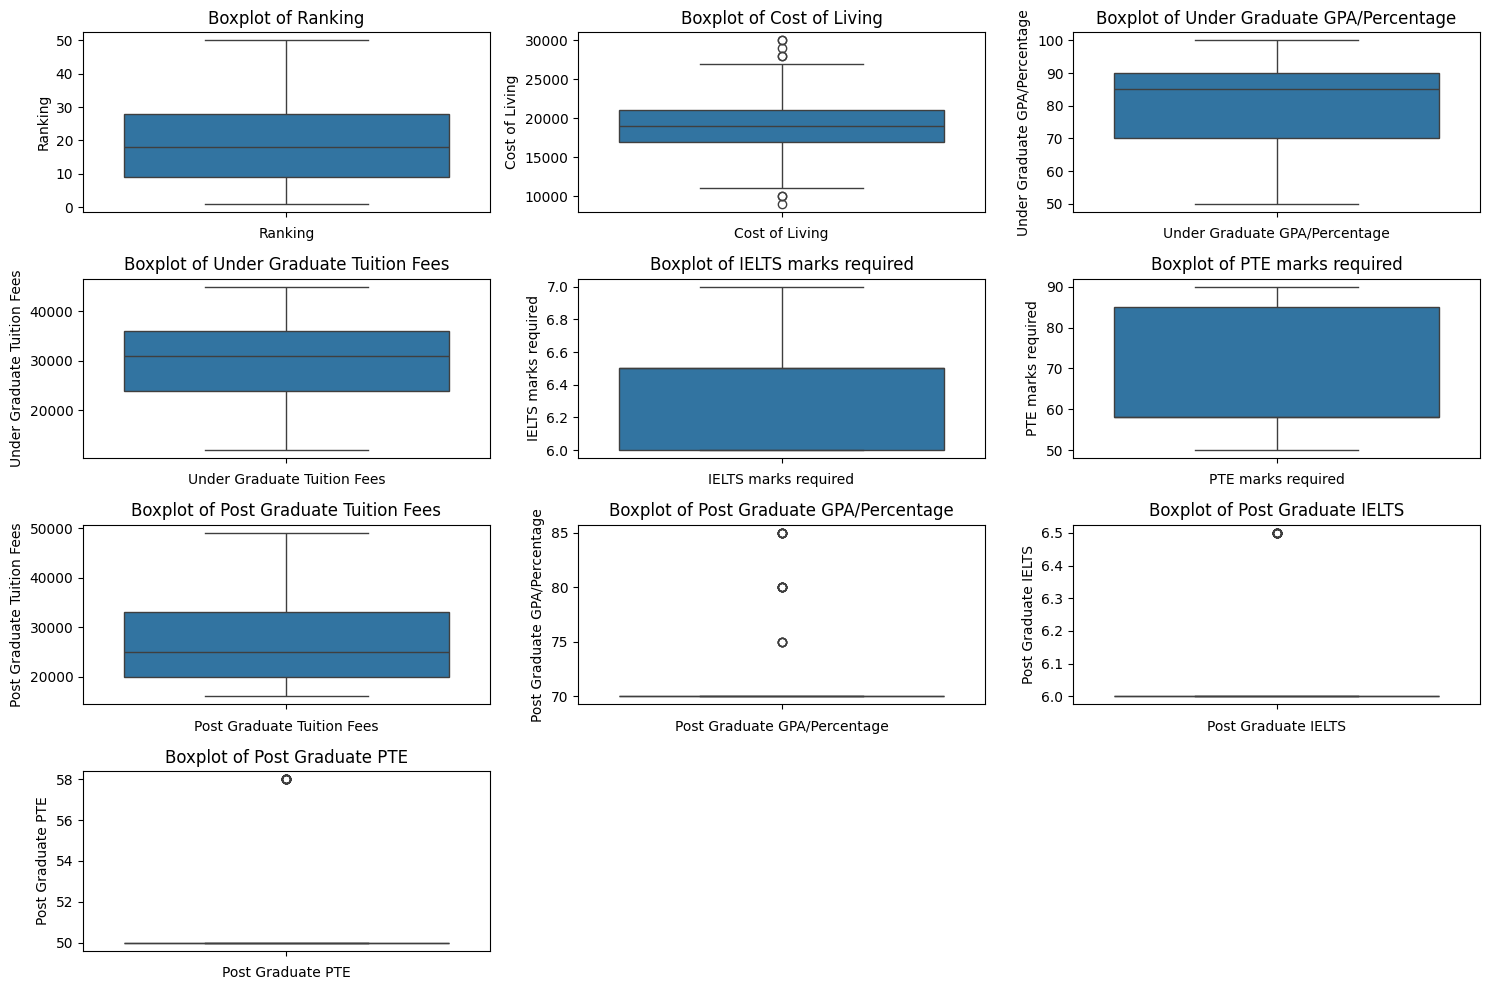

In [35]:
# Box plots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

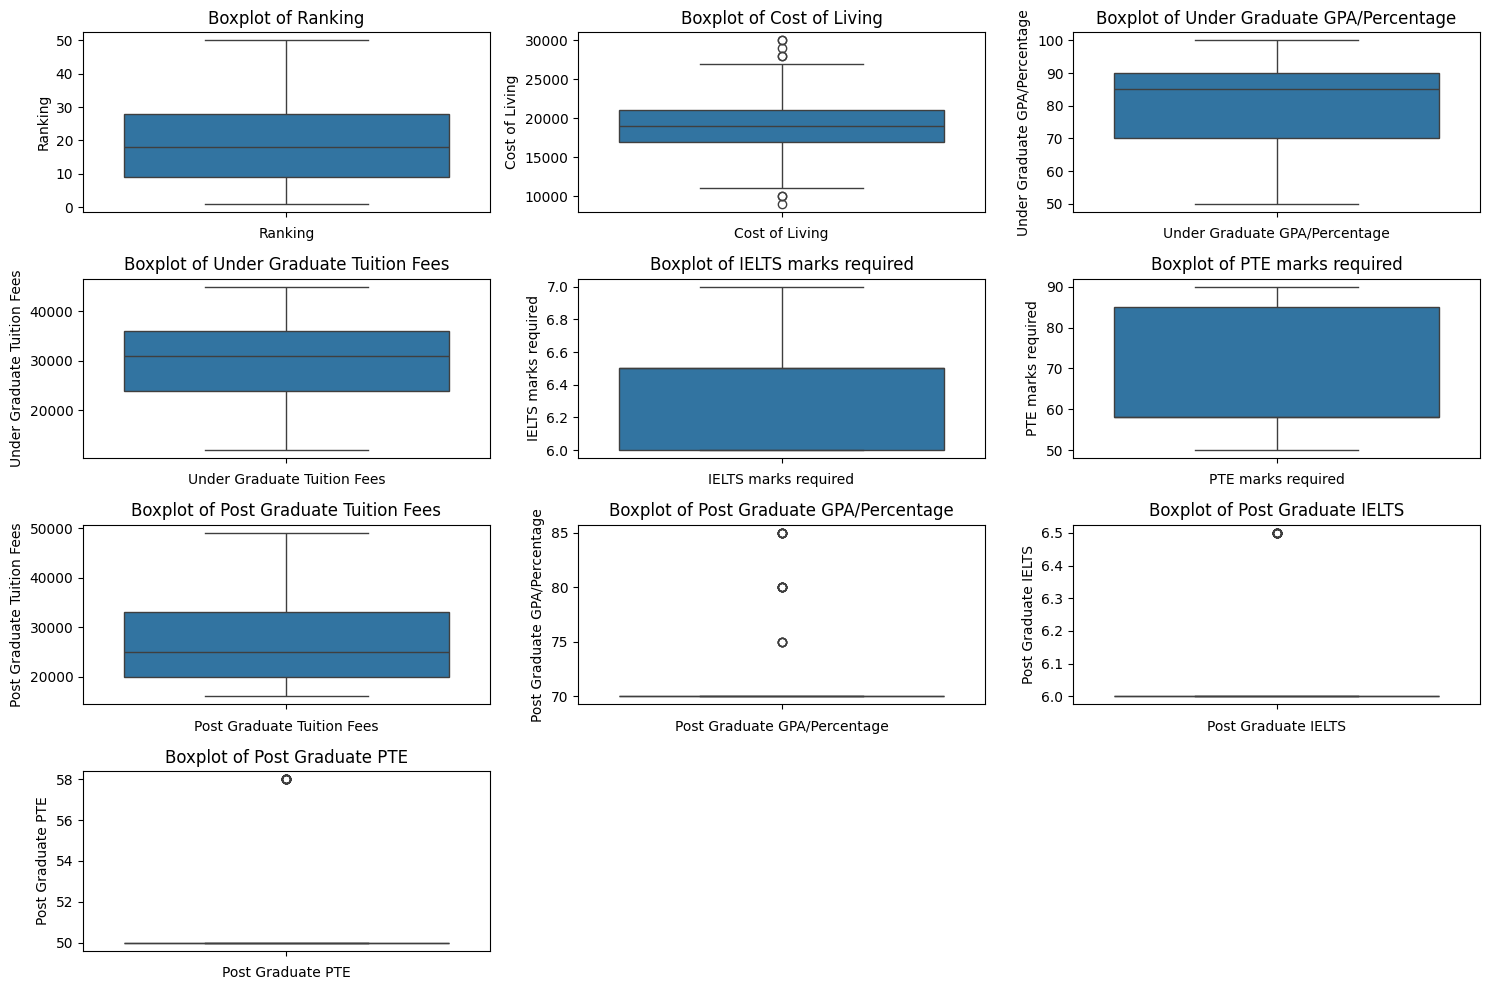

In [36]:
# Box plots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

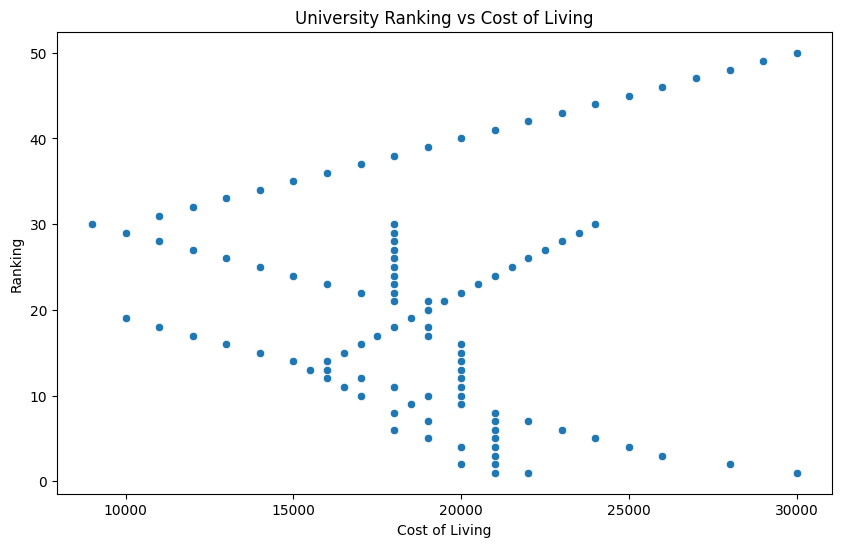

In [37]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of Living', y='Ranking', data=data)
plt.title('University Ranking vs Cost of Living')
plt.xlabel('Cost of Living')
plt.ylabel('Ranking')
plt.show()

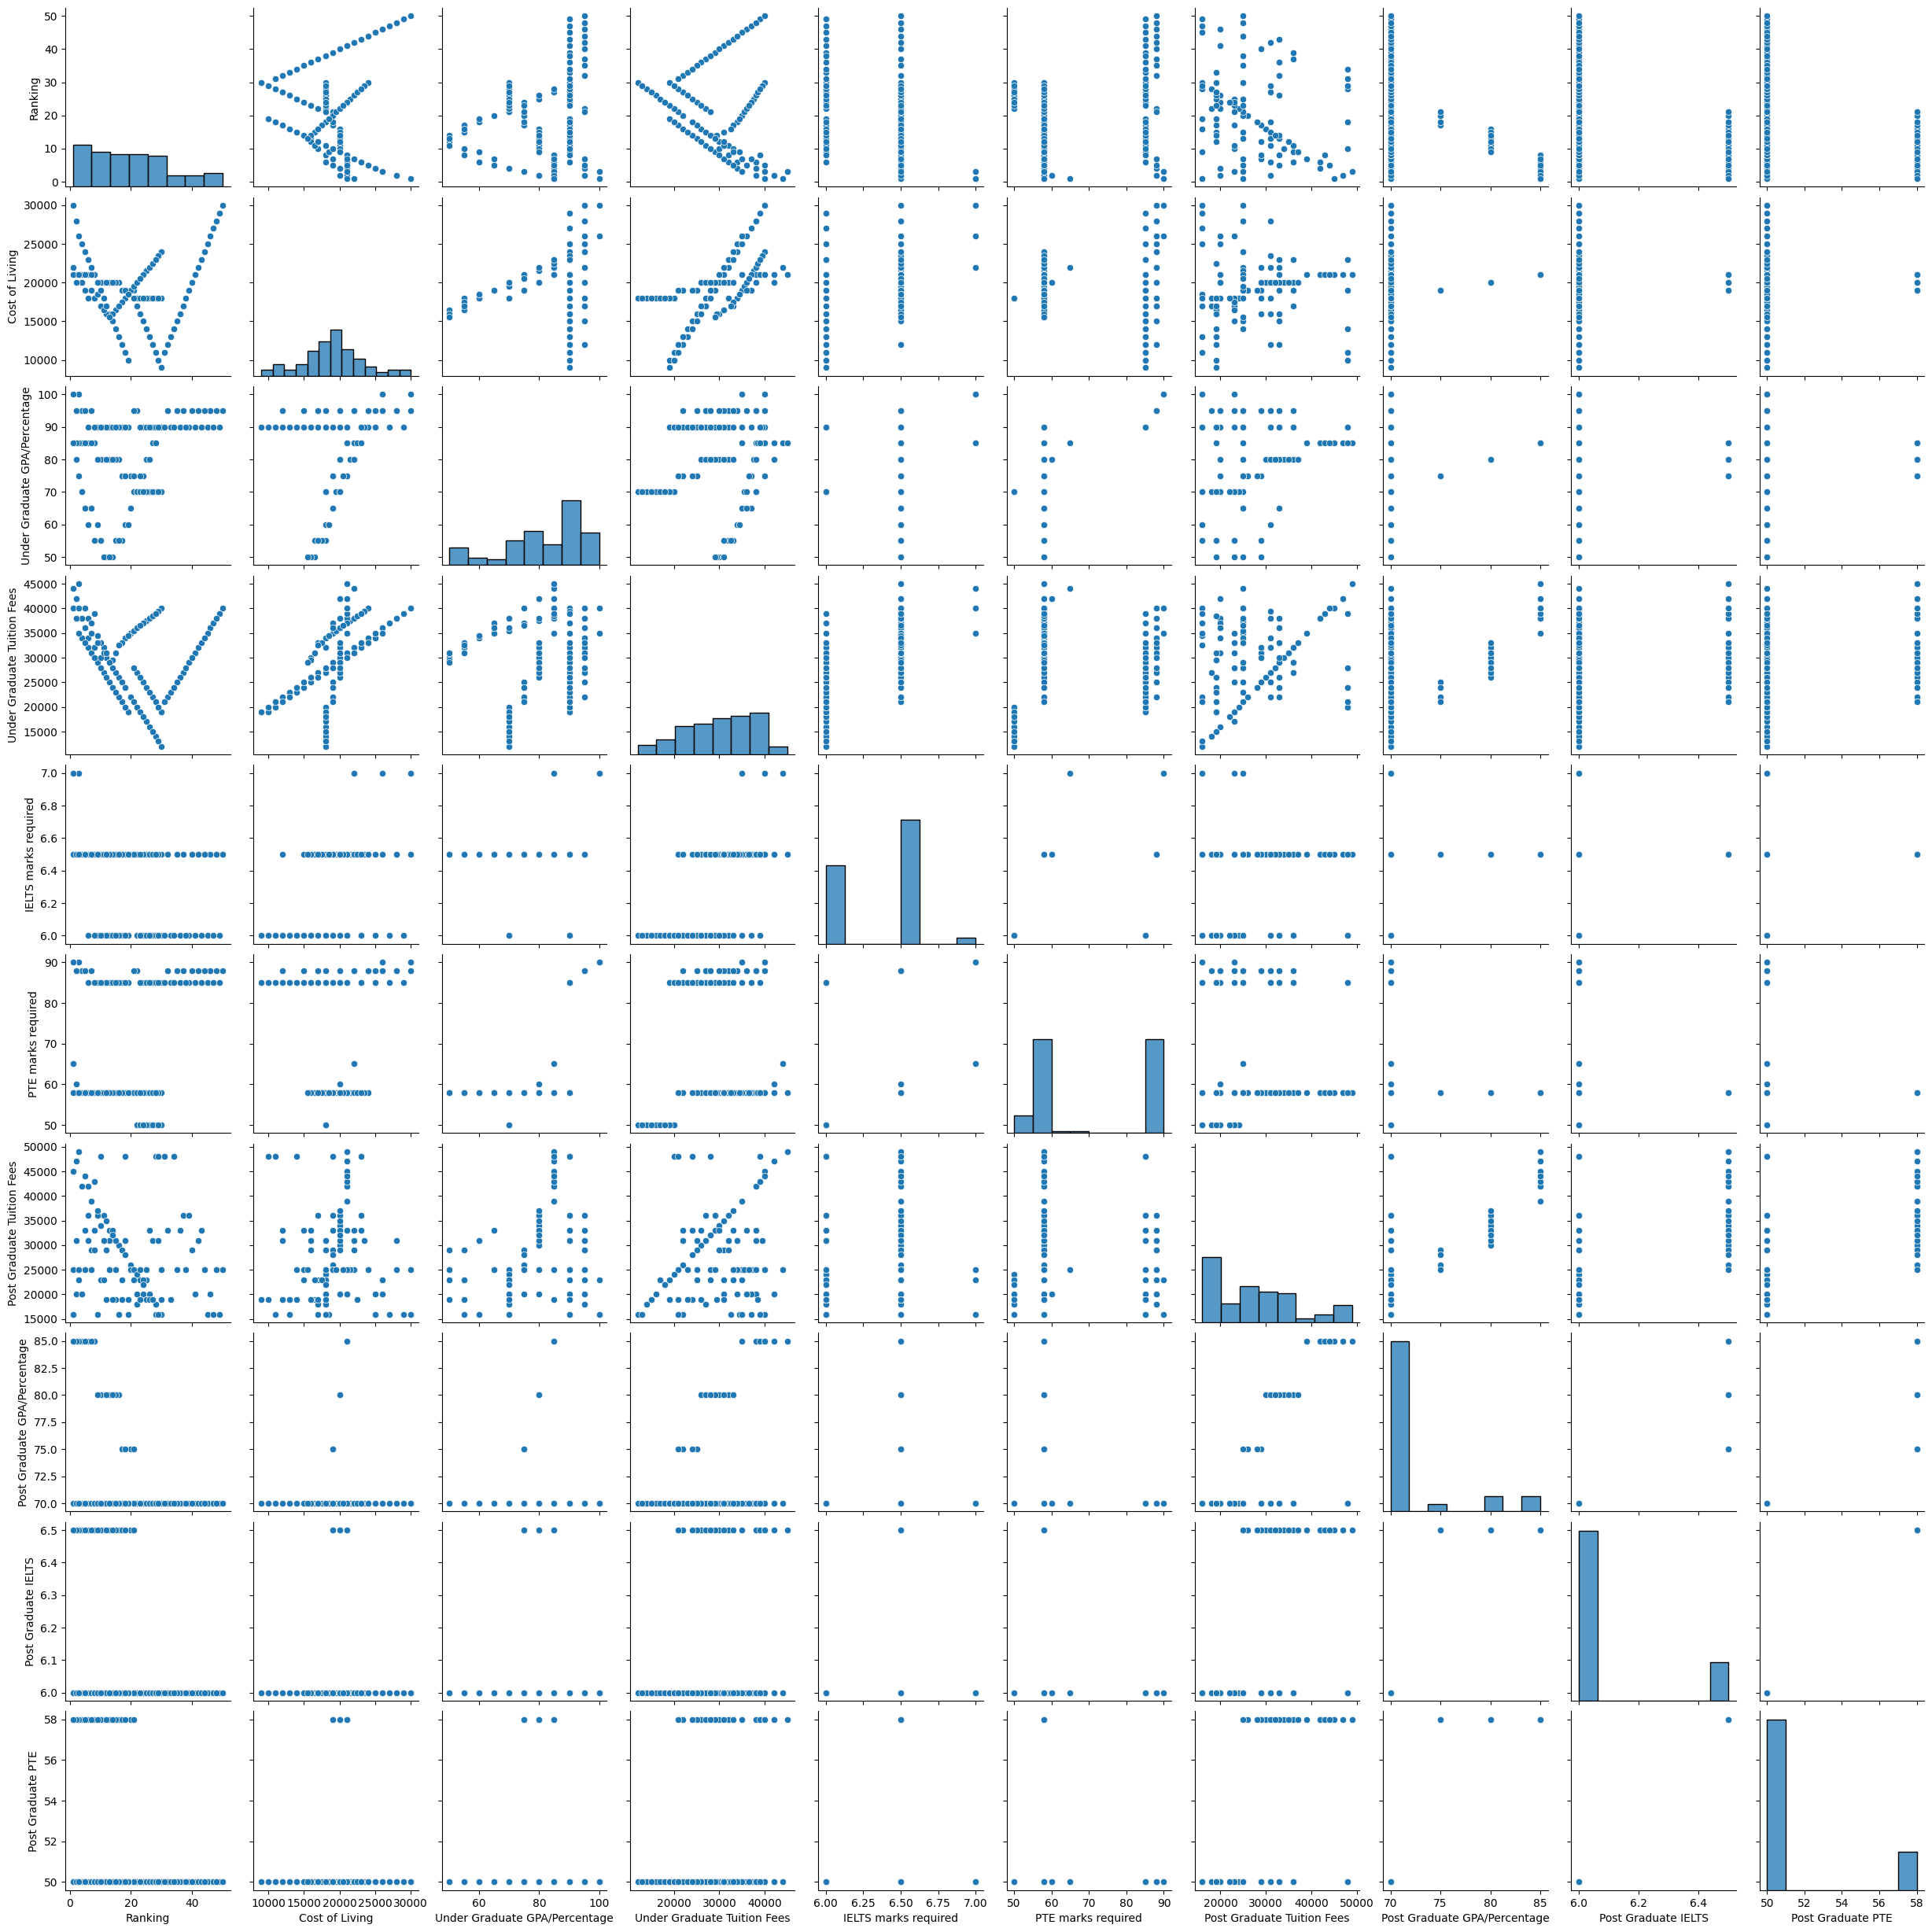

In [38]:
# Pair plot to analyze relationships
sns.pairplot(data[numerical_cols])
plt.show()


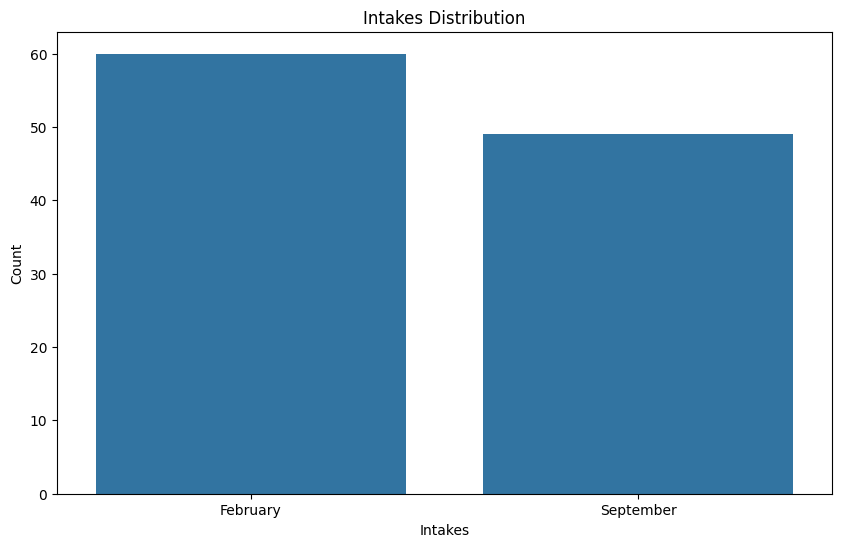

In [40]:
# Bar plot of Intakes
plt.figure(figsize=(10, 6))
sns.countplot(x='Intakes', data=data)
plt.title('Intakes Distribution')
plt.xlabel('Intakes')
plt.ylabel('Count')
plt.show()

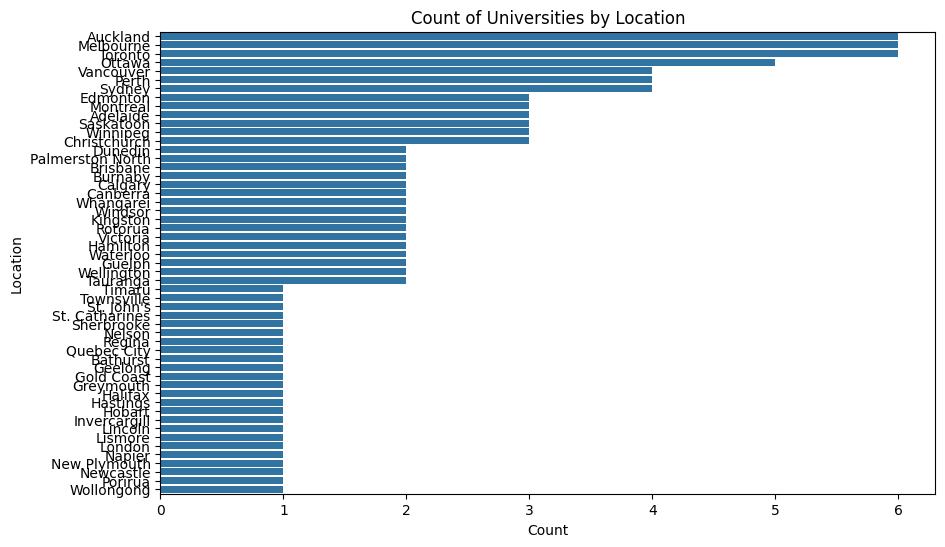

In [41]:
# Analysis of Counts by Location
plt.figure(figsize=(10, 6))
sns.countplot(y='Location', data=data, order=data['Location'].value_counts().index)
plt.title('Count of Universities by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


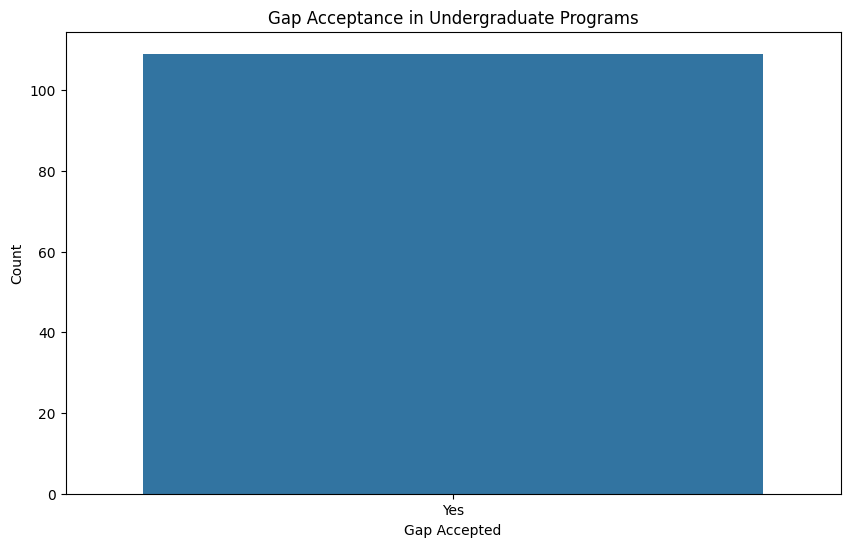

In [42]:

# Analysis of Gap Acceptance
plt.figure(figsize=(10, 6))
sns.countplot(x='Gap?', data=data)
plt.title('Gap Acceptance in Undergraduate Programs')
plt.xlabel('Gap Accepted')
plt.ylabel('Count')
plt.show()

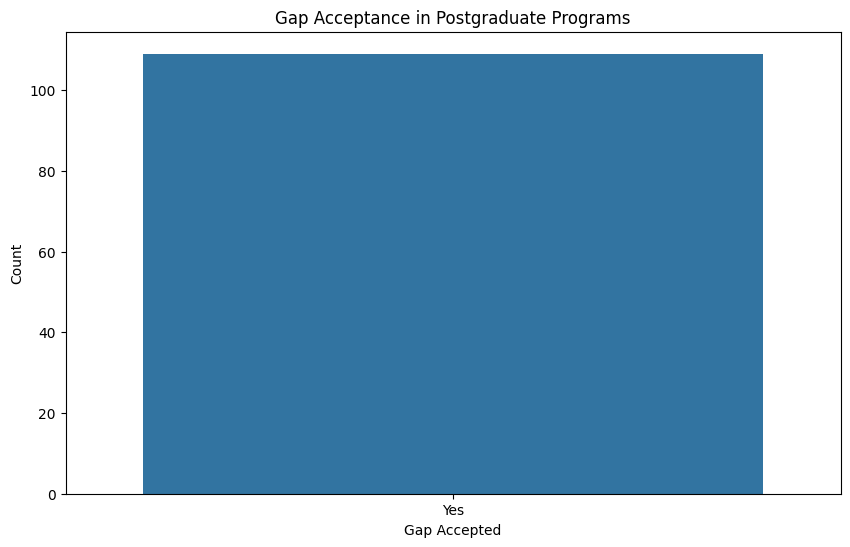

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Post Graduate Gap Acceptance', data=data)
plt.title('Gap Acceptance in Postgraduate Programs')
plt.xlabel('Gap Accepted')
plt.ylabel('Count')
plt.show()

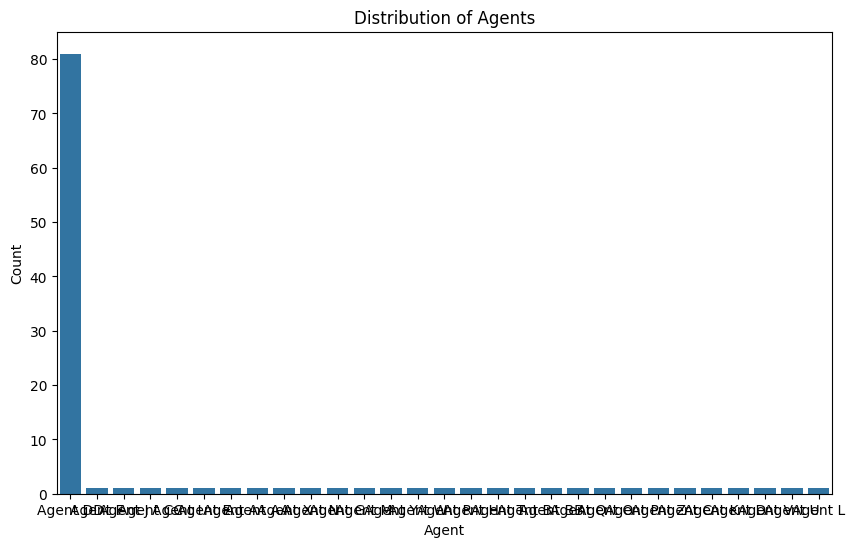

In [44]:
# Analysis of Agent Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Agent', data=data, order=data['Agent'].value_counts().index)
plt.title('Distribution of Agents')
plt.xlabel('Agent')
plt.ylabel('Count')
plt.show()

In [45]:
# Detailed Descriptive Statistics
categorical_cols = ['Name', 'Location', 'Intakes', 'Gap?', 'Post Graduate Gap Acceptance', 'Agent']
print("Descriptive Statistics for Categorical Variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())

# Chi-Square Test for Independence between Categorical Variables
from scipy.stats import chi2_contingency

def chi_square_test(col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

chi2, p = chi_square_test('Location', 'Intakes')
print(f"\nChi-Square Test between Location and Intakes: chi2={chi2}, p-value={p}")

Descriptive Statistics for Categorical Variables:

Name:
Name
University of Toronto               4
University of British Columbia      4
University of Ottawa                3
University of Manitoba              3
University of Saskatchewan          3
                                   ..
Southern Cross University           1
Lincoln University                  1
Southern Institute of Technology    1
University of Tasmania              1
University of Wollongong            1
Name: count, Length: 82, dtype: int64

Location:
Location
Auckland            6
Melbourne           6
Toronto             6
Ottawa              5
Vancouver           4
Perth               4
Sydney              4
Edmonton            3
Montreal            3
Adelaide            3
Saskatoon           3
Winnipeg            3
Christchurch        3
Dunedin             2
Palmerston North    2
Brisbane            2
Burnaby             2
Calgary             2
Canberra            2
Whangarei           2
Windsor             2
